<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [65]:
# Reading the json files and keeping the texts and stars of all reviews in a pandas dataframe.

import os
import pandas as pd
import json

def read_json_files():
    dirpath = r'C:\Users\Raheyma Arshad\Desktop\Assignment four data Yelp (question 1 and 2)\\'
    files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]
    
    text = []
    stars = []
    for filename in files:
        with open(filename, encoding='utf-8') as data_file:
            json_decode = json.load(data_file)
        
        for item in json_decode:
            text.append(item['text'])
        for item in json_decode:
            stars.append(item['stars'])
    
    for i in range(0, len(stars)): 
        stars[i] = int(stars[i]) 
    
    data = pd.DataFrame({'text': text, 'stars': stars})
    return data

data = read_json_files()

# Cleaning and Prerprocessing the dataset

# Lower casing
data['clean text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Punctuation removal
data['clean text'] = data['clean text'].str.replace('[^\w\s]','')
# Stopwords removal
from nltk.corpus import stopwords
import nltk
stop = stopwords.words('english')
data['clean text'] = data['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# Frequent words removal
high_freq = pd.Series(' '.join(data['clean text']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
data['clean text'] = data['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))
# Rare words removal
low_freq = pd.Series(' '.join(data['clean text']).split()).value_counts()[-10:]
low_freq = list(low_freq.index)
data['clean text'] = data['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

data.head()

,text,stars,clean text
0,"As someone who has worked with many museums, I...",2,someone worked many museums eager visit galler...
1,I am actually horrified this place is still in...,1,actually horrified still business 3 year old s...
2,I love Deagan's. I do. I really do. The atmosp...,5,love deagans really atmosphere cozy festive sh...
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1,dismal lukewarm defrostedtasting texmex glop m...
4,"Oh happy day, finally have a Canes near my cas...",4,oh happy day finally canes near casa yes other...


In [68]:
############################################################################################################################
# (4) Supervised LDA Model
############################################################################################################################

# Keeping the reviews and their stars in separate lists

reviews = data['clean text'].to_list()
ratings = data['stars'].to_list()

# Importing the necessary packages for Supervised LDA Model

import os
import logging

import numpy as np
import matplotlib.pyplot as plt

from ptm import slda_gibbs
from ptm.nltk_corpus import get_ids_cnt
from ptm.utils import convert_cnt_to_list, get_top_words

%matplotlib inline  

logger = logging.getLogger('GibbsSupervisedLDA')
logger.propagate = False

# Reading and Tokenizing the dataset

voca, word_ids, word_cnt = get_ids_cnt(reviews)
corpus = convert_cnt_to_list(word_ids, word_cnt)

n_doc = len(corpus)
n_voca = voca.size
print('Number of Documents:', n_doc, '\nNumber of Vocabulary:', n_voca)

# Infering topics with Supervised LDA

n_topic = 20
r_var = 0.01

model = GibbsSupervisedLDA(n_doc, n_voca, n_topic, sigma=r_var)
model.fit(corpus, ratings)

# Displaying top 15 words from the 20 clusters

for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=15)
    print('Topic', ti ,':', ','.join(top_words), '\nEta:', model.eta[ti], '\n')

Number of Documents: 500000 
Number of Vocabulary: 34591


2020-11-30 03:51:01 INFO:GibbsSupervisedLDA:[ITER] 0,	MAE:0.09,	log_likelihood:-189444923.18
2020-11-30 03:51:01 INFO:GibbsSupervisedLDA:[ITER] 0,	MAE:0.09,	log_likelihood:-189444923.18
2020-11-30 04:12:51 INFO:GibbsSupervisedLDA:[ITER] 1,	MAE:0.08,	log_likelihood:-185878841.58
2020-11-30 04:12:51 INFO:GibbsSupervisedLDA:[ITER] 1,	MAE:0.08,	log_likelihood:-185878841.58


Topic 6 : dont,well,even,got,ordered,said,room,say,night,take,told,next,pretty,way,wasnt 
Eta: -11.38373077952285 

Topic 10 : got,well,ordered,dont,even,way,said,staff,pretty,amazing,say,next,told,going,order 
Eta: -8.228900130004734 

Topic 13 : got,ordered,well,dont,staff,restaurant,order,way,amazing,going,chicken,take,pretty,took,recommend 
Eta: -5.352671971643747 

Topic 17 : got,ordered,well,dont,staff,amazing,order,restaurant,going,way,chicken,pretty,recommend,since,said 
Eta: -5.3505130209636 

Topic 9 : got,ordered,well,dont,staff,order,amazing,way,restaurant,pretty,recommend,take,going,chicken,took 
Eta: -4.659024542601734 

Topic 4 : got,ordered,well,dont,staff,order,amazing,way,restaurant,going,pretty,chicken,recommend,never,take 
Eta: -3.8893001310610384 

Topic 8 : got,ordered,well,staff,dont,order,chicken,restaurant,going,way,amazing,pretty,give,take,never 
Eta: -3.416808353080468 

Topic 19 : got,ordered,well,dont,staff,order,restaurant,amazing,way,pretty,never,chicken,

In [31]:
############################################################################################################################
# (3) HMM LDA Model
############################################################################################################################

# Creating a corpus and vocabulary for all reviews in the dataframe

def get_corpus():
    
    all_corpus = []
    dirpath = r'C:\Users\rak0120\Desktop\Assignment four data Yelp (question 1 and 2)\\'
    files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]
    
    for filename in files:
        with open(filename, encoding='utf-8') as data_file:
            json_decode = json.load(data_file)
        
        text = []
        for item in json_decode:
            text.append(item['text'])
        
        voca, word_ids, word_cnt = get_ids_cnt(text)
        corpus = convert_cnt_to_list(word_ids, word_cnt)
        all_corpus.append(corpus)

    return all_corpus

hmm_corpus = get_corpus()

reviews = data['clean text'].to_list()
hmm_voca, hmm_word_ids, hmm_word_cnt = get_ids_cnt(reviews)

hmm_n_doc = 5000
hmm_n_voca = hmm_voca.size

# Infering topics with HMM LDA

from ptm import hmm_lda

hmm_logger = logging.getLogger('HMM_LDA')
hmm_logger.propagate=False

n_topic = 20
n_class = 20

hmm_model = hmm_lda.HMM_LDA(hmm_n_doc, hmm_n_voca, n_topic, n_class, alpha=0.1, beta=0.01, gamma=0.1, eta=0.1, verbose=False)
hmm_model.fit(hmm_corpus, max_iter=2)

# Displaying top 15 words from the 20 clusters

for ti in range(n_topic):
    top_words = get_top_words(hmm_model.TW, hmm_voca, ti, n_words=15)
    print('Topic', ti ,': ', ','.join(top_words), '\n')

Topic 0 :  marinated,result,coleslaw,highlight,correctly,replacement,poorly,apology,rolled,golden,pickup,quantity,hearing,current,fashion 

Topic 1 :  jack,correctly,informative,among,technician,subway,reserved,eats,holiday,batter,pickup,golden,easier,apology,workout 

Topic 2 :  necessary,fitness,dancing,downstairs,tart,membership,yoga,obvious,eats,cupcake,industry,wise,batter,train,social 

Topic 3 :  noisy,magic,correctly,proper,workout,handled,rolled,selling,batter,convenience,fashion,estimate,prepare,previously,result 

Topic 4 :  omelet,eats,fitness,hearing,batter,vodka,current,fashion,penny,downstairs,obvious,weekday,yoga,membership,cabbage 

Topic 5 :  train,result,prepare,holiday,fitness,social,pickup,apology,poorly,proper,teeth,correctly,tower,switch,highlight 

Topic 6 :  lazy,melt,holiday,industry,marinated,penny,feed,obvious,stopping,subway,ceiling,cabbage,fountain,among,tart 

Topic 7 :  gourmet,necessary,chat,bobby,elevator,informative,preferred,omelet,obvious,breast,mig

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [38]:
# Cleaning and Preprocessing

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from textblob import TextBlob

data['clean text'] = data['text'].str.replace('[^\w\s]','')
data['clean text'] = data['clean text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['clean text'] = data['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def sentiment(x):
    if x == 5:
        return 'Very positive'
    if x == 4:
        return 'Positive'
    if x == 3:
        return 'Neutral'
    if x == 2:
        return 'Negative'
    if x == 1:
        return 'Very negative'
    
data['sentiment'] = data['stars'].apply(lambda x: sentiment(x))

# Splitting data into training and test sets

import sklearn
from sklearn.model_selection import train_test_split

train, test = sklearn.model_selection.train_test_split(data, train_size=0.8, test_size=0.2)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=100, 
                                               learning_rate='optimal', tol=None))])

svm = svm_pipeline.fit(train['clean text'], train['sentiment'])
test['predicted sentiment'] = svm.predict(test['clean text'])

<ipython-input-39-d68f263a0891>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted sentiment'] = svm.predict(test['clean text'])


In [40]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('\n', 'TFIDF-BASED SVM SENTIMENT IDENTIFICATION:', '\n')
print(test[['text', 'sentiment', 'predicted sentiment']].head(5))

svm_recall = recall_score(test['sentiment'], test['predicted sentiment'], average='macro')
svm_precision = precision_score(test['sentiment'], test['predicted sentiment'], average='macro')
svm_accuracy = accuracy_score(test['sentiment'], test['predicted sentiment'])*100
svm_f1 = f1_score(test['sentiment'], test['predicted sentiment'], average='macro')

print('\n', 'The accuracy of the TFIDF-based SVM sentiment identification is:', svm_accuracy)
print('The f1-score of the TFIDF-based SVM sentiment identification is:', svm_f1)
print('The precision score of the TFIDF-based SVM sentiment identification is:', svm_precision)
print('The recall score of the TFIDF-based SVM sentiment identification is:', svm_recall)


 TFIDF-BASED SVM SENTIMENT IDENTIFICATION: 

                                                     text      sentiment  \
332511  I have been here a few times now and I find th...       Positive   
46485   I loved my first visit there, a nice girl was ...  Very negative   
197177  Great happy hour prices and selection! Fresh f...  Very positive   
350128  The homemade soups are excellent!  I have had ...  Very positive   
212575  Delivery person left a pink slip on my door wi...  Very negative   

       predicted sentiment  
332511       Very positive  
46485        Very negative  
197177       Very positive  
350128       Very positive  
212575       Very negative  

 The accuracy of the TFIDF-based SVM sentiment identification is: 56.567
The f1-score of the TFIDF-based SVM sentiment identification is: 0.3506897669042158
The precision score of the TFIDF-based SVM sentiment identification is: 0.519756434830375
The recall score of the TFIDF-based SVM sentiment identification is: 0.3785

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB())])

nb = nb_pipeline.fit(train['clean text'], train['sentiment'])
test['nb predicted sentiment'] = nb.predict(test['clean text'])

<ipython-input-41-576fe2ad5da8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['nb predicted sentiment'] = nb.predict(test['clean text'])


In [42]:
print('\n', 'TFIDF-BASED NAIVE BAYES SENTIMENT IDENTIFICATION:', '\n')
print(test[['text', 'sentiment', 'nb predicted sentiment']].head(5))

nb_recall = recall_score(test['sentiment'], test['nb predicted sentiment'], average='macro')
nb_precision = precision_score(test['sentiment'], test['nb predicted sentiment'], average='macro')
nb_accuracy = accuracy_score(test['sentiment'], test['nb predicted sentiment'])*100
nb_f1 = f1_score(test['sentiment'], test['nb predicted sentiment'], average='macro')

print('\n', 'The accuracy of the TFIDF-based Naive Bayes sentiment identification is:', nb_accuracy)
print('The f1-score of the TFIDF-based Naive Bayes sentiment identification is:', nb_f1)
print('The precision score of the TFIDF-based Naive Bayes sentiment identification is:', nb_precision)
print('The recall score of the TFIDF-based Naive Bayes sentiment identification is:', svm_recall)


 TFIDF-BASED NAIVE BAYES SENTIMENT IDENTIFICATION: 

                                                     text      sentiment  \
332511  I have been here a few times now and I find th...       Positive   
46485   I loved my first visit there, a nice girl was ...  Very negative   
197177  Great happy hour prices and selection! Fresh f...  Very positive   
350128  The homemade soups are excellent!  I have had ...  Very positive   
212575  Delivery person left a pink slip on my door wi...  Very negative   

       nb predicted sentiment  
332511          Very positive  
46485           Very positive  
197177          Very positive  
350128          Very positive  
212575          Very negative  

 The accuracy of the TFIDF-based Naive Bayes sentiment identification is: 53.408
The f1-score of the TFIDF-based Naive Bayes sentiment identification is: 0.29613422630106356
The precision score of the TFIDF-based Naive Bayes sentiment identification is: 0.5994245849201049
The recall score of the

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [58]:
# Getting the data 

train = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\test.csv")

data = pd.concat([train, test], axis=0)

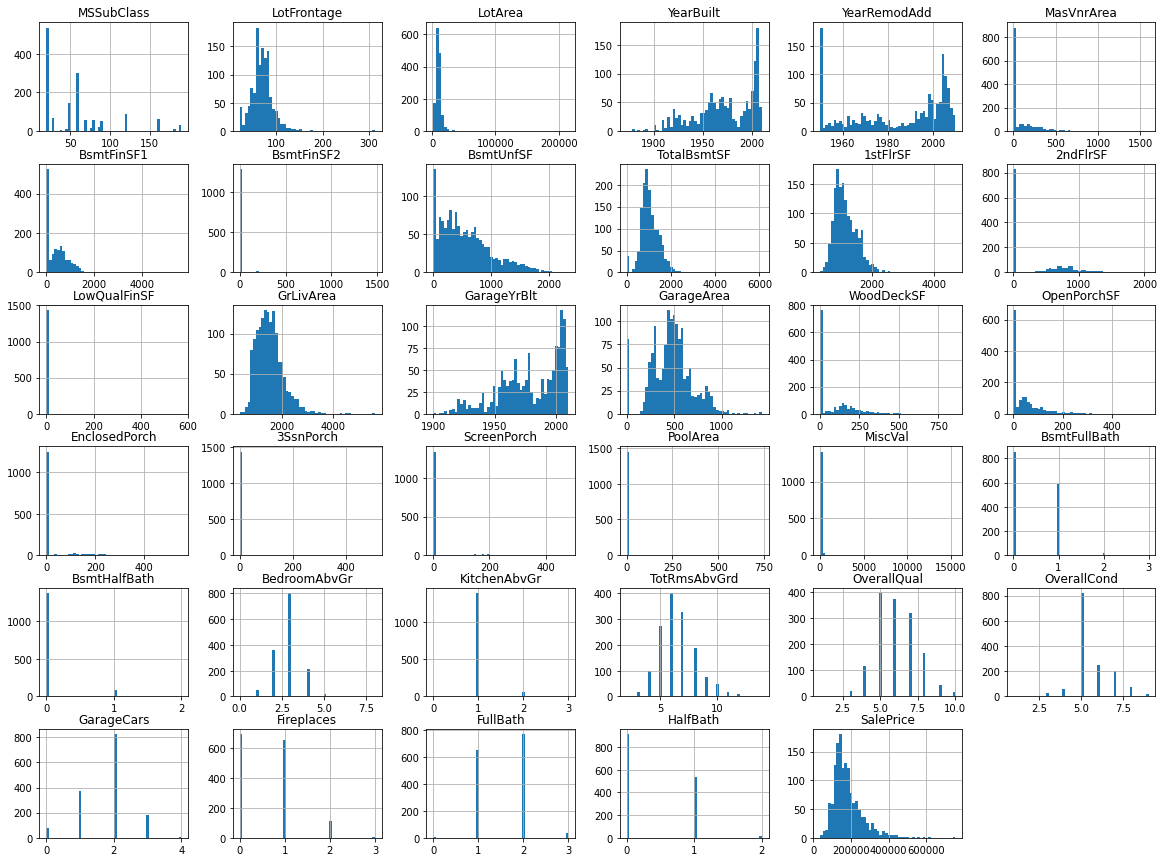

The Correlation Values are:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,OverallQual,OverallCond,GarageCars,Fireplaces,FullBath,HalfBath,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,2.866438,1.046575,6.517808,6.099315,5.575342,1.767123,0.613014,1.565068,0.382877,180921.195890
std,42.300571,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,0.815778,0.220338,1.625393,1.382997,1.112799,0.747315,0.644666,0.550916,0.502885,79442.502883
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,2.000000,1.000000,5.000000,5.000000,5.000000,1.000000,0.000000,1.000000,0.000000,129975.000000
50%,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,3.000000,1.000000,6.000000,6.000000,5.000000,2.000000,1.000000,2.000000,0.000000,163000.000000
75%,70.000000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,3.000000,1.000000,7.000000,7.000000,6.000000,2.000000,1.000000,2.000000,1.000000,214000.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,8.000000,3.000000,14.000000,10.000000,9.000000,4.000000,3.000000,3.000000,2.000000,755000.000000


In [59]:
# Quantitative Variables

numerics = data[['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                 'PoolArea', 'MiscVal', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                 'OverallQual', 'OverallCond', 'GarageCars', 'Fireplaces', 'FullBath', 'HalfBath', 'SalePrice']][0:1460]

# Plotting histograms for the variables
%matplotlib inline
import matplotlib.pyplot as plt
numerics.hist(bins=50, figsize=(20,15))
plt.show()

# Calculating correlation values for each variable and the dependent variable 'SalePrice'
corr_matrix = numerics.corr()
print('The Correlation Values are:\n', corr_matrix["SalePrice"].sort_values(ascending=False))

# Getting description of each numeric variable
numerics.describe()

In [60]:
# Creating dummy variables for qualitative variables

n1 = pd.get_dummies(data.SaleCondition)
data = pd.concat([data, n1], axis=1)
n2 = pd.get_dummies(data.Neighborhood)
data = pd.concat([data, n2], axis=1)
n3 = pd.get_dummies(data.BsmtExposure)
data = pd.concat([data, n3], axis=1)
n4 = pd.get_dummies(data.BsmtFinType1)
data = pd.concat([data, n4], axis=1)
n5 = pd.get_dummies(data.BsmtFinType2)
data = pd.concat([data, n5], axis=1)
n6 = pd.get_dummies(data.GarageFinish)
data = pd.concat([data, n6], axis=1)
n7 = pd.get_dummies(data.MiscFeature)
data = pd.concat([data, n7], axis=1)
n8 = pd.get_dummies(data.KitchenQual)
data = pd.concat([data, n8], axis=1)
n9 = pd.get_dummies(data.LandContour)
data = pd.concat([data, n9], axis=1)
n10 = pd.get_dummies(data.Exterior1st)
data = pd.concat([data, n10], axis=1)
n11 = pd.get_dummies(data.Exterior2nd)
data = pd.concat([data, n11], axis=1)
n12 = pd.get_dummies(data.FireplaceQu)
data = pd.concat([data, n12], axis=1)
n13 = pd.get_dummies(data.GarageQual)
data = pd.concat([data, n13], axis=1)
n14 = pd.get_dummies(data.GarageCond)
data = pd.concat([data, n14], axis=1)
n15 = pd.get_dummies(data.PavedDrive)
data = pd.concat([data, n15], axis=1)
n16 = pd.get_dummies(data.GarageType)
data = pd.concat([data, n16], axis=1)
n17 = pd.get_dummies(data.Functional)
data = pd.concat([data, n17], axis=1)
n18 = pd.get_dummies(data.Foundation)
data = pd.concat([data, n18], axis=1)
n19 = pd.get_dummies(data.MasVnrType)
data = pd.concat([data, n19], axis=1)
n20 = pd.get_dummies(data.Condition1)
data = pd.concat([data, n20], axis=1)
n21 = pd.get_dummies(data.Condition2)
data = pd.concat([data, n21], axis=1)
n22 = pd.get_dummies(data.HouseStyle)
data = pd.concat([data, n22], axis=1)
n23 = pd.get_dummies(data.CentralAir)
data = pd.concat([data, n23], axis=1)
n24 = pd.get_dummies(data.Electrical)
data = pd.concat([data, n24], axis=1)
n25 = pd.get_dummies(data.Utilities)
data = pd.concat([data, n25], axis=1)
n26 = pd.get_dummies(data.LotConfig)
data = pd.concat([data, n26], axis=1)
n27 = pd.get_dummies(data.LandSlope)
data = pd.concat([data, n27], axis=1)
n28 = pd.get_dummies(data.RoofStyle)
data = pd.concat([data, n28], axis=1)
n29 = pd.get_dummies(data.ExterQual)
data = pd.concat([data, n29], axis=1)
n30 = pd.get_dummies(data.ExterCond)
data = pd.concat([data, n30], axis=1)
n31 = pd.get_dummies(data.HeatingQC)
data = pd.concat([data, n31], axis=1)
n32 = pd.get_dummies(data.MSZoning)
data = pd.concat([data, n32], axis=1)
n33 = pd.get_dummies(data.LotShape)
data = pd.concat([data, n33], axis=1)
n34 = pd.get_dummies(data.BldgType)
data = pd.concat([data, n34], axis=1)
n35 = pd.get_dummies(data.RoofMatl)
data = pd.concat([data, n35], axis=1)
n36 = pd.get_dummies(data.BsmtQual)
data = pd.concat([data, n36], axis=1)
n37 = pd.get_dummies(data.BsmtCond)
data = pd.concat([data, n37], axis=1)
n38 = pd.get_dummies(data.SaleType)
data = pd.concat([data, n38], axis=1)
n39 = pd.get_dummies(data.Heating)
data = pd.concat([data, n39], axis=1)
n40 = pd.get_dummies(data.Street)
data = pd.concat([data, n40], axis=1)
n41 = pd.get_dummies(data.PoolQC)
data = pd.concat([data, n41], axis=1)
n42 = pd.get_dummies(data.MoSold)
data = pd.concat([data, n42], axis=1)
n43 = pd.get_dummies(data.YrSold)
data = pd.concat([data, n43], axis=1)
n44 = pd.get_dummies(data.Fence)
data = pd.concat([data, n44], axis=1)
n45 = pd.get_dummies(data.Alley)
data = pd.concat([data, n45], axis=1)

drops = ['SaleCondition', 'Neighborhood', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'MiscFeature', 
         'KitchenQual', 'LandContour', 'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive',
         'GarageType', 'Functional', 'Foundation', 'MasVnrType', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir', 
         'Electrical', 'Utilities', 'LotConfig', 'LandSlope', 'RoofStyle', 'ExterQual', 'ExterCond', 'HeatingQC', 'MSZoning',
         'LotShape', 'BldgType', 'RoofMatl', 'BsmtQual', 'BsmtCond', 'SaleType', 'Heating', 'Street', 'PoolQC', 'MoSold', 
         'YrSold', 'Fence', 'Alley']

data.drop(drops, inplace=True, axis=1)
data.head()
# data[0:1460].to_csv(r"C:\Users\Raheyma Arshad\Desktop\Processed Train.csv")
# data[1460:].to_csv(r"C:\Users\Raheyma Arshad\Desktop\Processed Test.csv")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,2007,2008,2009,2010,GdPrv,GdWo,MnPrv,MnWw,Grvl,Pave
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,1,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,1,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,1,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
# Training the Multiple Linear Regression Model

processed_train = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Processed Train.csv")
del processed_train['Unnamed: 0']
del processed_train['Id']

X = processed_train.loc[:, processed_train.columns != 'SalePrice']
X.fillna(X.mean(), inplace = True)
Y = processed_train['SalePrice']

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

C:\Users\Raheyma Arshad\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


LinearRegression()

In [62]:
# Predicting Sale Price of Test Data

processed_test = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Processed Test.csv")
del processed_test['Unnamed: 0']
del processed_test['Id']
del processed_test['SalePrice']
processed_test.fillna(processed_test.mean(), inplace = True)

test['Pred SalePrice'] = regressor.predict(processed_test)
test['Pred SalePrice'].head()

0    114585.902355
1    167163.304258
2    186094.909778
3    197346.568568
4    209028.328720
Name: Pred SalePrice, dtype: float64